In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd 
df = pd.read_csv('Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [6]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [7]:
df.shape


(545, 12)

In [8]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [9]:
df['furnishingstatus'].replace({0:'unfurnished', 1:'furnsihed'}, inplace=True)


In [10]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [11]:
df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [12]:
print (f'{round(df["price"].value_counts(normalize=True)*100,2)}')


3500000     3.12
4200000     3.12
4900000     2.20
3150000     1.65
5600000     1.65
            ... 
6580000     0.18
4319000     0.18
4375000     0.18
4382000     0.18
13300000    0.18
Name: price, Length: 219, dtype: float64


bi

In [13]:

category = pd.crosstab(df['area'],df['furnishingstatus'], margins=True)
print(category)


furnishingstatus  furnished  semi-furnished  unfurnished  All
area                                                         
1650                      0               0            1    1
1700                      0               0            1    1
1836                      0               1            0    1
1905                      0               1            0    1
1950                      0               0            2    2
...                     ...             ...          ...  ...
12944                     0               0            1    1
13200                     2               0            0    2
15600                     0               1            0    1
16200                     0               0            1    1
All                     140             227          178  545

[285 rows x 4 columns]


<Axes: title={'center': 'Housing Analysis'}, xlabel='area'>

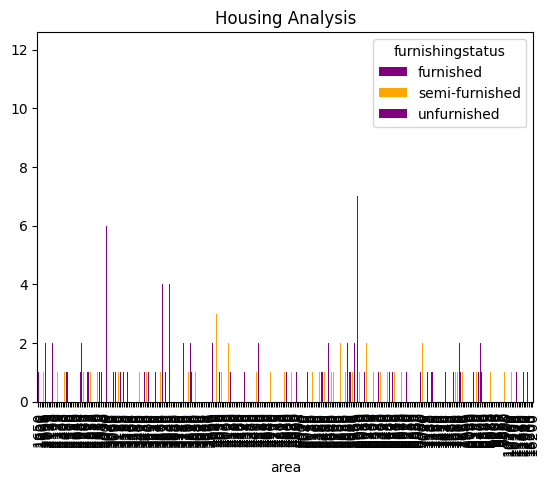

In [14]:
category.iloc[:-1,:-1].plot(kind='bar',stacked=False, color=['purple','orange'], grid=False, title='Housing Analysis')


In [15]:

bivariate = pd.crosstab(df['area'],df['bedrooms'], margins=True)
print(bivariate)

bedrooms  1    2    3   4   5  6  All
area                                 
1650      0    0    1   0   0  0    1
1700      0    0    1   0   0  0    1
1836      0    1    0   0   0  0    1
1905      0    0    0   0   1  0    1
1950      0    0    2   0   0  0    2
...      ..  ...  ...  ..  .. ..  ...
12944     0    0    1   0   0  0    1
13200     0    1    1   0   0  0    2
15600     0    0    1   0   0  0    1
16200     0    0    0   0   1  0    1
All       2  136  300  95  10  2  545

[285 rows x 7 columns]


<Axes: title={'center': 'Housing Analysis'}, xlabel='area'>

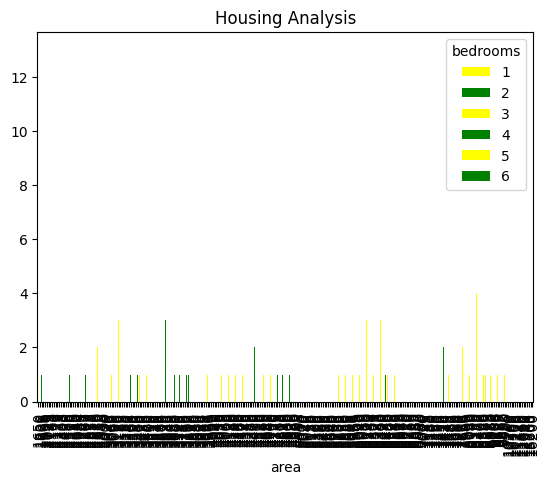

In [16]:
bivariate.iloc[:-1,:-1].plot(kind='bar',stacked=False, color=['yellow','green'], grid=False, title='Housing Analysis')


Text(0, 0.5, 'bedrooms')

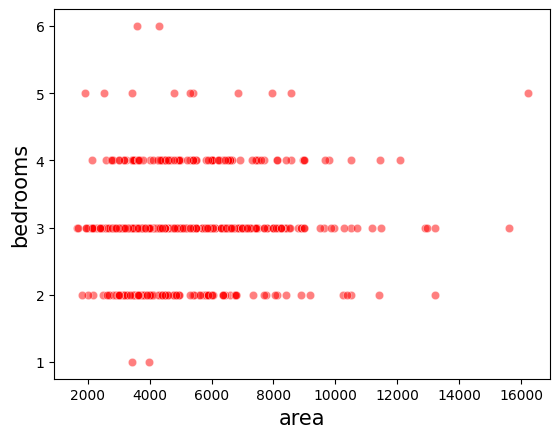

In [17]:

sns.scatterplot(x=df['area'], y=df['bedrooms'], alpha=0.5, color='red')
plt.xlabel('area', fontsize=15)
plt.ylabel('bedrooms', fontsize=15)

<Axes: xlabel='area', ylabel='basement'>

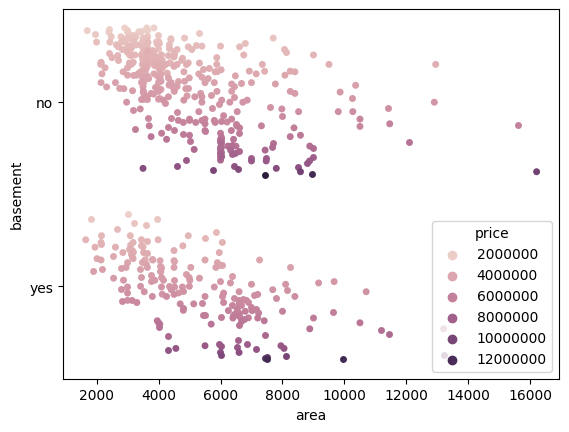

In [25]:
import seaborn as sns

sns.swarmplot(x='area',y='basement',hue='price',dodge='True',data=df)

Text(0, 0.5, 'stories')

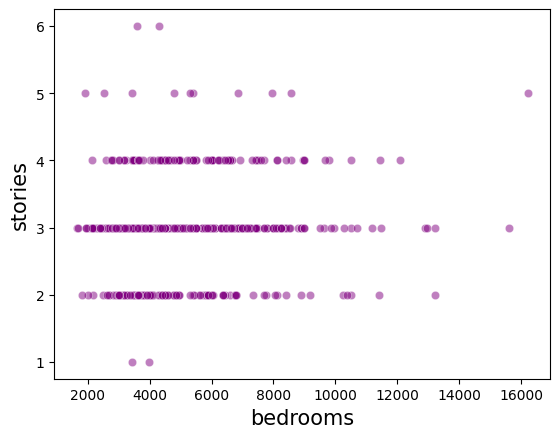

In [26]:
sns.scatterplot(x=df['area'], y=df['bedrooms'], alpha=0.5, color='purple')
plt.xlabel('bedrooms', fontsize=15)
plt.ylabel('stories', fontsize=15)

<Axes: xlabel='bedrooms', ylabel='guestroom'>

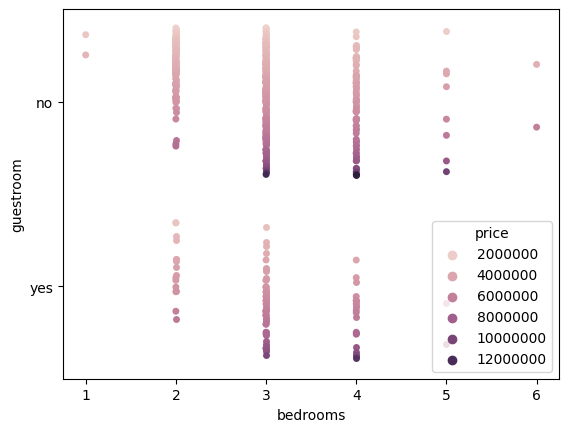

In [27]:
sns.stripplot(x='bedrooms',y='guestroom',hue='price',dodge='True',data=df)


<Axes: title={'center': 'bathrooms'}, xlabel='furnishingstatus'>

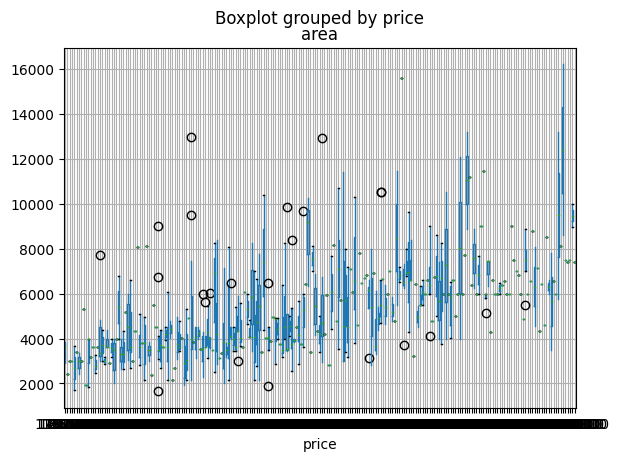

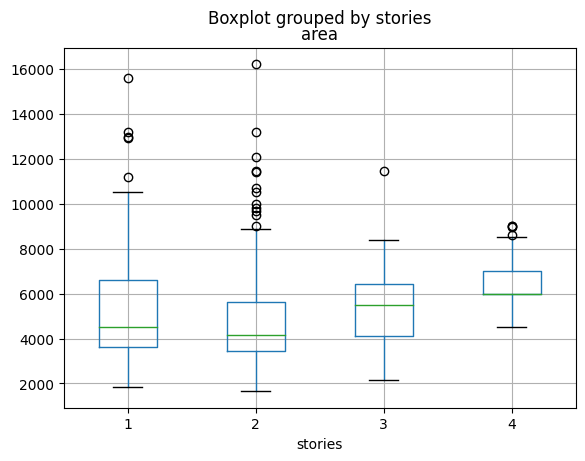

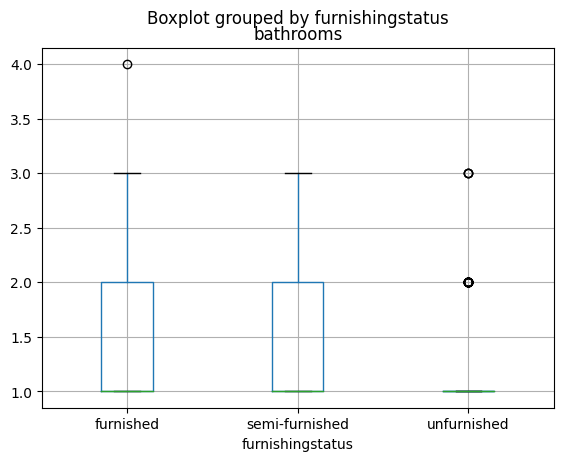

In [28]:

df.boxplot(column='area', by='price')


df.boxplot(column='area', by='stories')



df.boxplot(column='bathrooms', by='furnishingstatus')

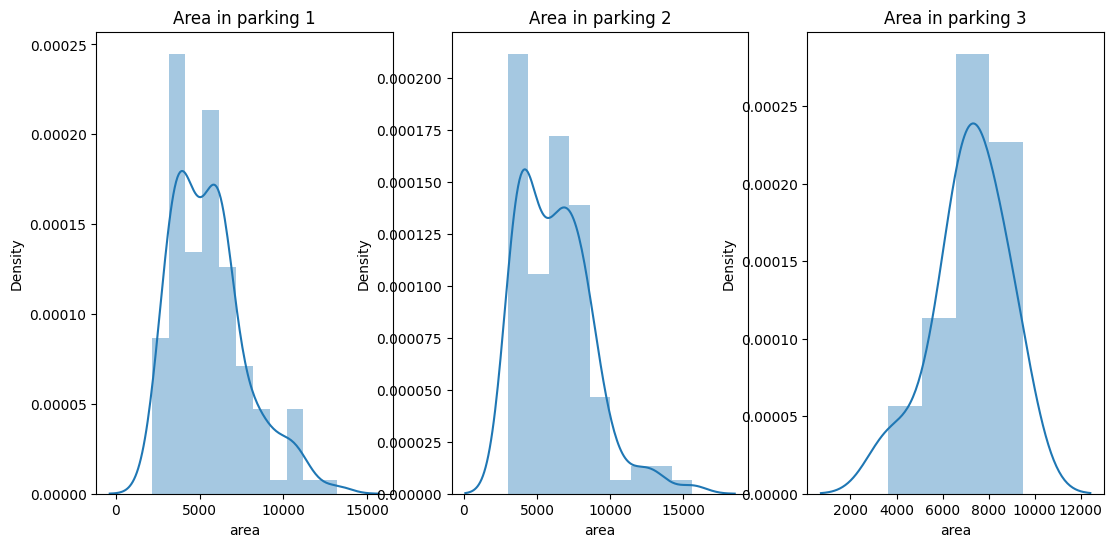

In [29]:
#MULTIVARIATE ANALYSIS
# In[ ]:


f,ax=plt.subplots(1,3,figsize=(13,6))
sns.distplot(df[df['parking']==1].area,ax=ax[0])
ax[0].set_title('Area in parking 1')
sns.distplot(df[df['parking']==2].area,ax=ax[1])
ax[1].set_title('Area in parking 2')
sns.distplot(df[df['parking']==3].area,ax=ax[2])
ax[2].set_title('Area in parking 3')
plt.show()

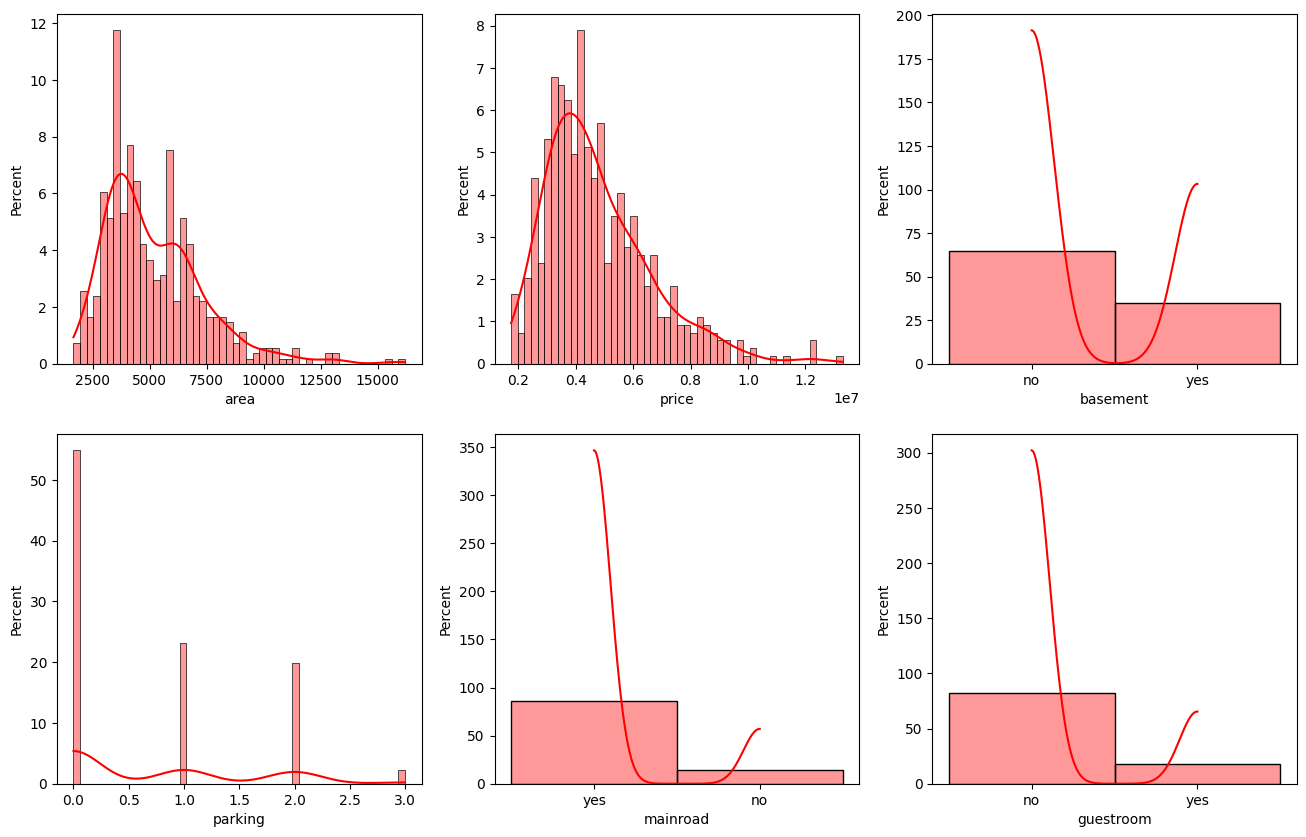

In [30]:
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins,
   
}
cols=[ 'area', 'price', 'basement', 'parking',
       'mainroad', 'guestroom']
fig, ax = plt.subplots(2,3, figsize=(16, 10))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        df[column], label='Titanic',
        ax=ax[i], color='red', **histplot_hyperparams
    )

In [31]:

price_filter_df = df[df['price']<=9800000]
price_filter_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,furnished


In [32]:
price_filter_df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [33]:
price_filter_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [34]:
# DESCRIPTIVE STATISTICS

df.shape

(545, 12)

In [35]:
df.info


<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [36]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [37]:
# MISSING VALUES

df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
furnishingstatus    0.0
dtype: float64

In [38]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

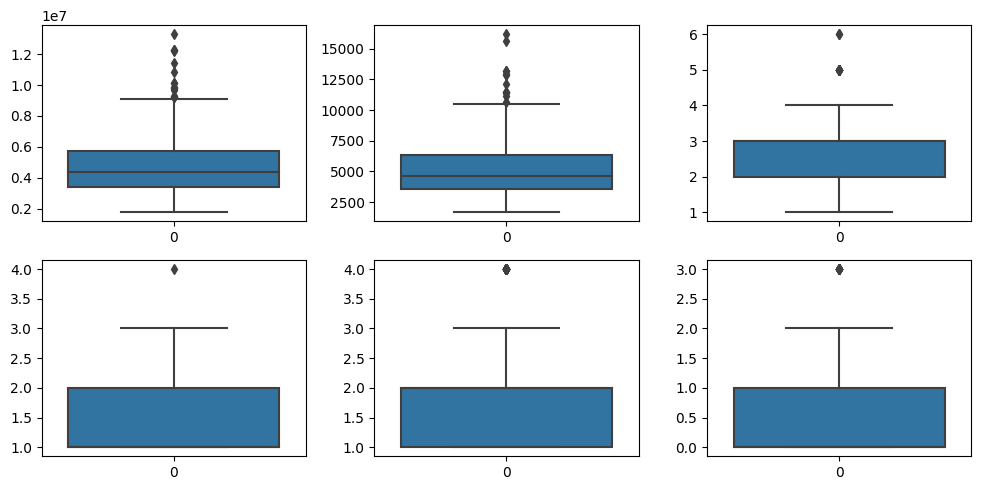

In [39]:
# Finding Outliers & replace them

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

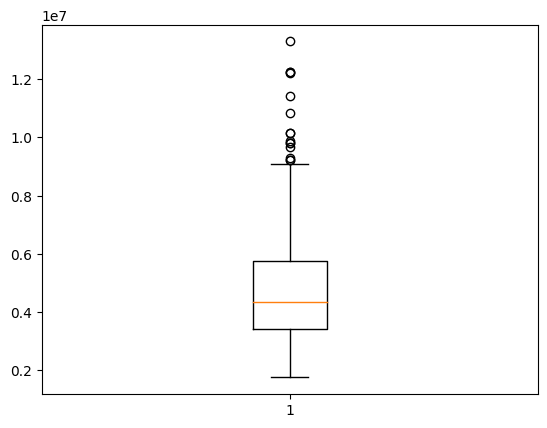

In [40]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

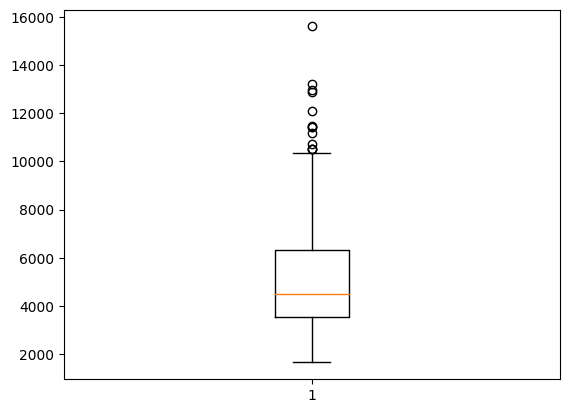

In [41]:

plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

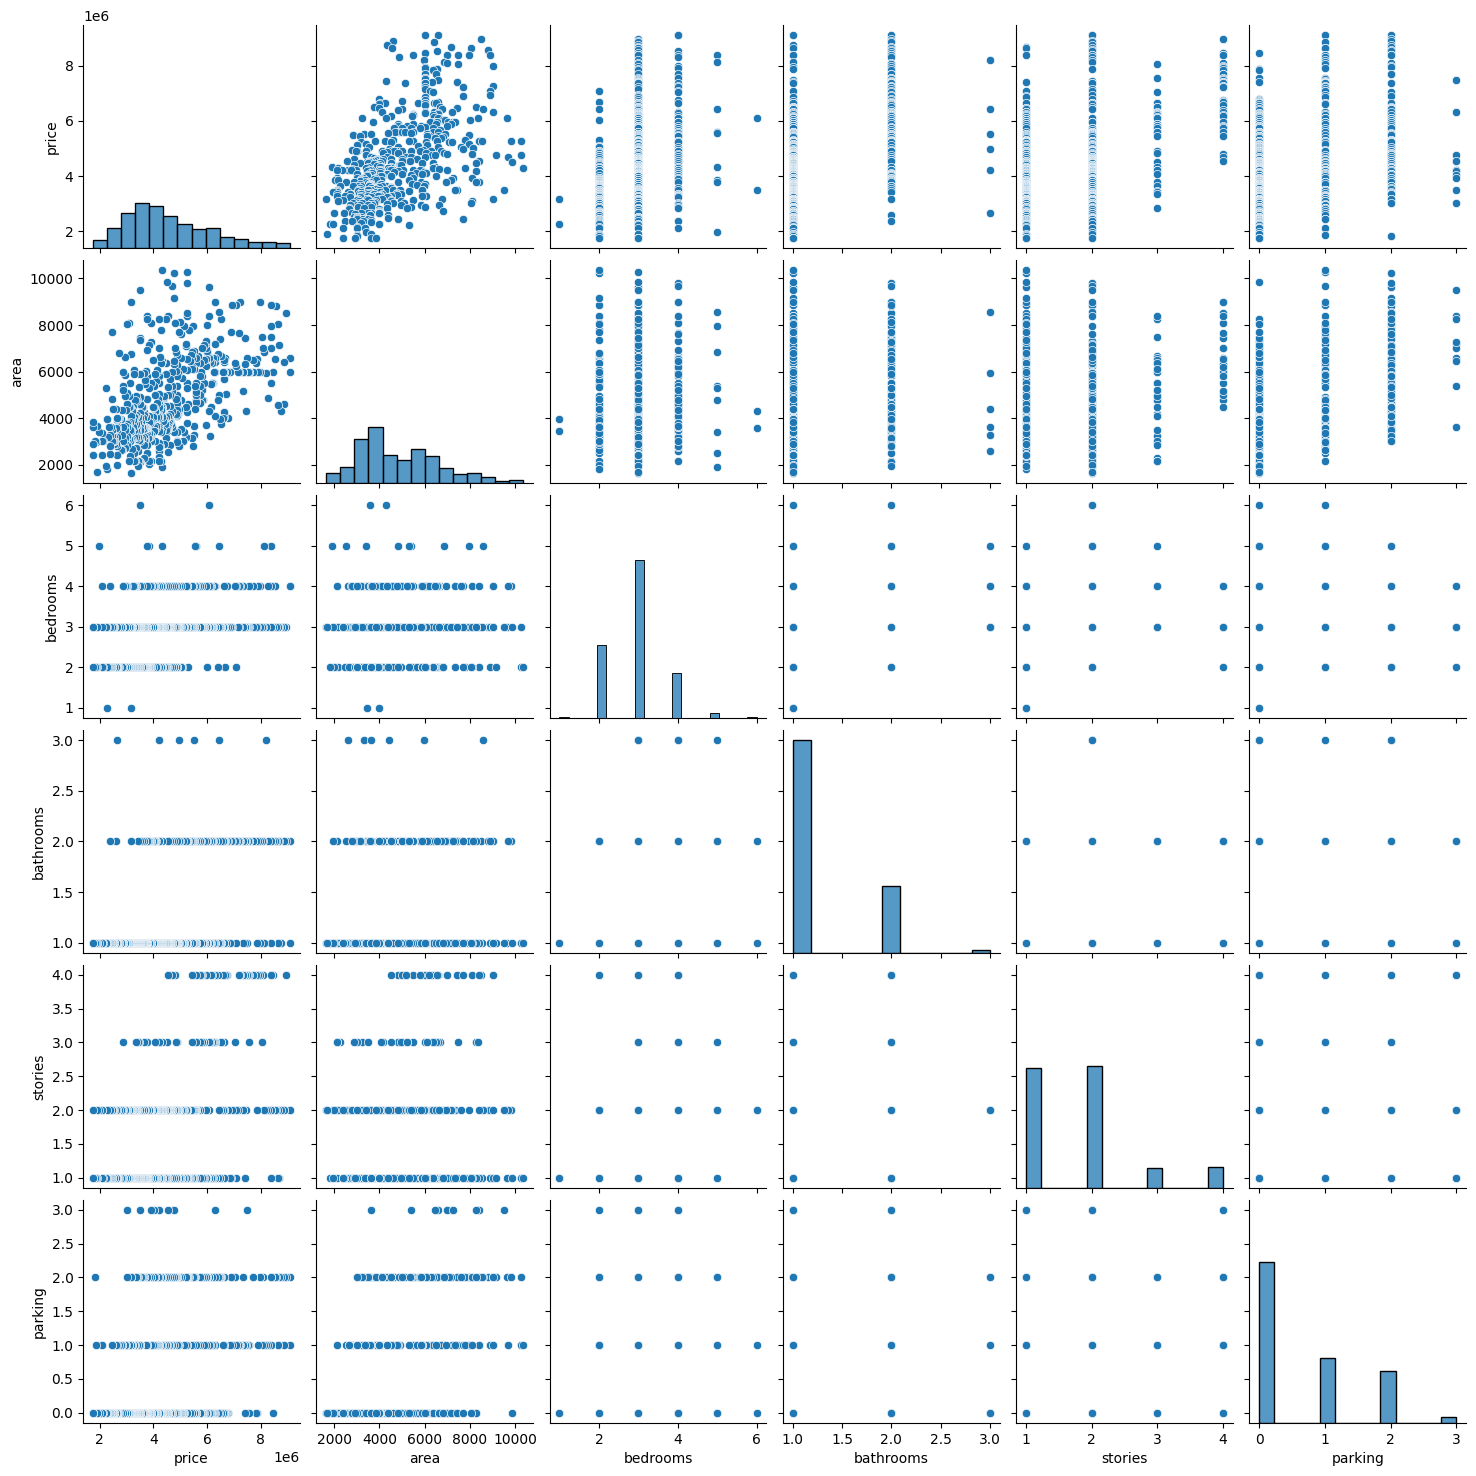

In [42]:
sns.pairplot(df)
plt.show()


In [43]:
# Categorical Columns And Encoding

df_category = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','furnishingstatus']]

In [44]:
df_category.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
15,yes,no,yes,no,no,semi-furnished
16,yes,yes,yes,no,yes,unfurnished
17,yes,no,no,no,yes,furnished
18,yes,yes,no,no,yes,furnished
19,yes,no,no,no,yes,semi-furnished


In [45]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[varlist] = df[varlist].apply(binary_map)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,semi-furnished


In [48]:
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [49]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [51]:
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,semi-furnished,1,0


In [52]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,semi-furnished,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,semi-furnished,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,furnished,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,furnished,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,unfurnished,0,1


In [54]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:

features = df.drop('mainroad', axis=1)
labels = df['mainroad']
print(features)
print(labels)
 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

       price  area  bedrooms  bathrooms  stories  guestroom  basement  \
15   9100000  6000         4          1        2          0         1   
16   9100000  6600         4          2        2          1         1   
17   8960000  8500         3          2        4          0         0   
18   8890000  4600         3          2        2          1         0   
19   8855000  6420         3          2        2          0         0   
..       ...   ...       ...        ...      ...        ...       ...   
540  1820000  3000         2          1        1          0         1   
541  1767150  2400         3          1        1          0         0   
542  1750000  3620         2          1        1          0         0   
543  1750000  2910         3          1        1          0         0   
544  1750000  3850         3          1        2          0         0   

     hotwaterheating  airconditioning  parking furnishingstatus  \
15                 0                0        2   semi-fu

In [56]:
# Split the data into dependent and independent variables.

print(df["price"].min())
print(df["price"].max())
print(df["price"].mean())

1750000
9100000
4568873.191489362


In [59]:
X = df.iloc[:, 0:4].values
print(X)

[[9100000    6000       4       1]
 [9100000    6600       4       2]
 [8960000    8500       3       2]
 ...
 [1750000    3620       2       1]
 [1750000    2910       3       1]
 [1750000    3850       3       1]]


In [60]:
Y = df.iloc[:, -3].values
print(Y)

['semi-furnished' 'unfurnished' 'furnished' 'furnished' 'semi-furnished'
 'semi-furnished' 'unfurnished' 'furnished' 'furnished' 'furnished'
 'furnished' 'semi-furnished' 'semi-furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'semi-furnished' 'furnished' 'unfurnished'
 'furnished' 'furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'furnished' 'furnished' 'unfurnished' 'semi-furnished'
 'furnished' 'semi-furnished' 'furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'unfurnished' 'furnished' 'semi-furnished'
 'semi-furnished' 'unfurnished' 'furnished' 'semi-furnished' 'furnished'
 'semi-furnished' 'semi-furnished' 'furnished' 'furnished' 'furnished'
 'unfurnished' 'furnished' 'semi-furnished' 'unfurnished' 'unfurnished'
 'furnished' 'furnished' 'semi-furnished' 'furnished' 'furnished'
 'furnished' 'furnished' 'semi-furnished' 'semi-furnished'
 'semi-furnished' 'semi-furnished' 'furnished' 'unfurnished'
 'semi-furnished' 'unfurnished' 'furnished

In [61]:
# Independent variables

import pandas as pd  
from sklearn import preprocessing 
print ("\n ORIG VAL: \n\n", X) 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_x= min_max_scaler.fit_transform(X) 
print ("\n VAL AFTER MIN MAX SCALING: \n\n", new_x) 

Standardisation = preprocessing.StandardScaler() 
new_x= Standardisation.fit_transform(X) 
print ("\n\n VALUES AFTER STD: \n\n", new_x) 


 ORIG VAL: 

 [[9100000    6000       4       1]
 [9100000    6600       4       2]
 [8960000    8500       3       2]
 ...
 [1750000    3620       2       1]
 [1750000    2910       3       1]
 [1750000    3850       3       1]]

 VAL AFTER MIN MAX SCALING: 

 [[1.         0.49942595 0.6        0.        ]
 [1.         0.56831228 0.6        0.5       ]
 [0.98095238 0.78645235 0.4        0.5       ]
 ...
 [0.         0.22617681 0.2        0.        ]
 [0.         0.14466131 0.4        0.        ]
 [0.         0.25258324 0.4        0.        ]]


 VALUES AFTER STD: 

 [[ 2.84389325  0.62442864  1.44738374 -0.56165231]
 [ 2.84389325  0.96199057  1.44738374  1.58926802]
 [ 2.75602437  2.0309367   0.07938119  1.58926802]
 ...
 [-1.76922315 -0.71456703 -1.28862136 -0.56165231]
 [-1.76922315 -1.11401532  0.07938119 -0.56165231]
 [-1.76922315 -0.58516829  0.07938119 -0.56165231]]


In [62]:
# TRAIN THE MODEL


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

KeyError: ignored

In [64]:
y_train = df_train.pop('price')
X_train = df_train

In [65]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

ValueError: ignored

In [67]:
rfe = RFE(lm,  n_features_to_select=6) 
rfe = rfe.fit(X_train, y_train)

ValueError: ignored

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:

col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]


In [ ]:
X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())